## 1. Creating Embeddings

In [66]:
import csv
import json
import numpy as np
import seaborn as sns
from scipy import spatial
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer

# Read classmates and their responses from a CSV file, replace classmates.csv with own link or file name
attendees_map = {}
with open('classmates.csv', newline='') as csvfile:
    classmates = csv.reader(csvfile, delimiter=',', quotechar='"')
    next(classmates)  # Skip the header row
    for row in classmates:
        name, paragraph = row
        attendees_map[paragraph] = name
        
# Generate sentence embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
paragraphs = list(attendees_map.keys())
embeddings = model.encode(paragraphs)
    
# Create a dictionary to store embeddings for each person
person_embeddings = {attendees_map[paragraph]: embedding for paragraph, embedding in zip(paragraphs, embeddings)}

# Save dictionary to file
person_embeddings = {key: value.tolist() for key, value in person_embeddings.items()} # Convert numpy arrays to lists

with open("embeddings.json", "w") as f:
    json.dump(person_embeddings, f)

## 2. Creating Visualization

In [67]:
# Reducing dimensionality of embedding data, scaling to coordinate domain/range
import umap

reducer = umap.UMAP(random_state=42) # set the seed to 42
scaler = StandardScaler()
scaled_data = scaler.fit_transform(list(person_embeddings.values()))
reduced_data = reducer.fit_transform(scaled_data)

In [68]:
import matplotlib.pyplot as plt

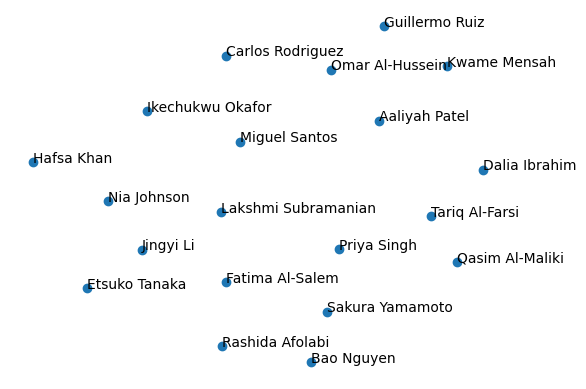

In [69]:
# Creating lists of coordinates with accompanying labels
x = [row[0] for row in reduced_data]
y = [row[1] for row in reduced_data]
label = list(person_embeddings.keys())

# Plotting and annotating data points
plt.scatter(x,y)
for i, name in enumerate(label):
    plt.annotate(name, (x[i], y[i]), fontsize="10")

# Clean-up and Export
plt.axis('off')
plt.savefig('visualization.png', dpi=800)


## 3. [BONUS] Providing top matches

In [70]:
from collections import defaultdict

In [71]:
top_matches = {}
all_personal_pairs = defaultdict(list)
for person in attendees_map.values():
    for person1 in attendees_map.values():
        all_personal_pairs[person].append([spatial.distance.cosine(person_embeddings[person1], person_embeddings[person]), person1])

for person in attendees_map.values():
    top_matches[person] = sorted(all_personal_pairs[person], key=lambda x: x[0])

print(top_matches)


{'Aaliyah Patel': [[0, 'Aaliyah Patel'], [0.5267263821175234, 'Kwame Mensah'], [0.6377065452564972, 'Carlos Rodriguez'], [0.6381716489165548, 'Guillermo Ruiz'], [0.7348864999368886, 'Qasim Al-Maliki'], [0.7735978314963982, 'Ikechukwu Okafor'], [0.7855776511393825, 'Omar Al-Hussein'], [0.8006706918593632, 'Lakshmi Subramanian'], [0.8140810029321385, 'Hafsa Khan'], [0.8147346304396669, 'Dalia Ibrahim'], [0.8508178188170012, 'Miguel Santos'], [0.8666834279761478, 'Fatima Al-Salem'], [0.8716674448140715, 'Priya Singh'], [0.8724694747306924, 'Nia Johnson'], [0.937162397651919, 'Bao Nguyen'], [0.945645061726381, 'Rashida Afolabi'], [0.9731315455840978, 'Tariq Al-Farsi'], [0.9809389944595245, 'Sakura Yamamoto'], [0.9831781315191164, 'Etsuko Tanaka'], [0.9865453923436107, 'Jingyi Li']], 'Bao Nguyen': [[0, 'Bao Nguyen'], [0.8024247809515102, 'Sakura Yamamoto'], [0.8086626122452819, 'Fatima Al-Salem'], [0.8314026302982215, 'Rashida Afolabi'], [0.8374372483400095, 'Qasim Al-Maliki'], [0.857686600

## 4. Embedding Comparison

In [76]:
from scipy.spatial.distance import cosine

# Load dictionary from file
with open("../scratch/embeddings-old.json", "r") as f:
    # Use json.load to read the dictionary from the file
    person_embeddings_old = json.load(f)

# Compute cosine similarity
for key, value in person_embeddings.items():
    # Get the corresponding value from the second dictionary
    value_old = person_embeddings_old[key]
    # Compute the cosine similarity between the embeddings
    cos_sim = 1 - cosine(value, value_old)
    # Print the key and similarity
    print(f"The cosine similarity between {key}'s embeddings is {cos_sim:.2f}")

The cosine similarity between Aaliyah Patel's embeddings is 0.81
The cosine similarity between Bao Nguyen's embeddings is 0.84
The cosine similarity between Carlos Rodriguez's embeddings is 0.24
The cosine similarity between Dalia Ibrahim's embeddings is 1.00
The cosine similarity between Etsuko Tanaka's embeddings is 1.00
The cosine similarity between Fatima Al-Salem's embeddings is 1.00
The cosine similarity between Guillermo Ruiz's embeddings is 1.00
The cosine similarity between Hafsa Khan's embeddings is 1.00
The cosine similarity between Ikechukwu Okafor's embeddings is 1.00
The cosine similarity between Jingyi Li's embeddings is 1.00
The cosine similarity between Kwame Mensah's embeddings is 1.00
The cosine similarity between Lakshmi Subramanian's embeddings is 1.00
The cosine similarity between Miguel Santos's embeddings is 1.00
The cosine similarity between Nia Johnson's embeddings is 1.00
The cosine similarity between Omar Al-Hussein's embeddings is 1.00
The cosine similarity